In [1]:
import pandas as pd

from aggme.aggregation import MaskAggregation
from aggme.utils import AnnotationData, Visualizer
from aggme.utils.processing import toloka_masks_to_template

# Loading data

In [2]:
data = AnnotationData(markup_type='mask')

In [3]:
df = pd.read_csv("./input_files/masks_data.csv")
df.head(3)

,INPUT:image,OUTPUT:markup,ASSIGNMENT:assignment_id,dimension
0,case_000_ov3,"[{'shape': 'polygon', 'points': [{'left': 0.9,...",user_1,"(100, 100)"
1,case_000_ov3,"[{'shape': 'polygon', 'points': [{'left': 0.79...",user_2,"(100, 100)"
2,case_000_ov3,"[{'shape': 'polygon', 'points': [{'left': 0.14...",user_3,"(100, 100)"


# Check and visualize the data

In [4]:
data.load_markups(df, toloka_masks_to_template)
group = data.groups[0]
group

MarkupGroup object
name: case_000_ov3
data_len: 6
annotators_len: 3

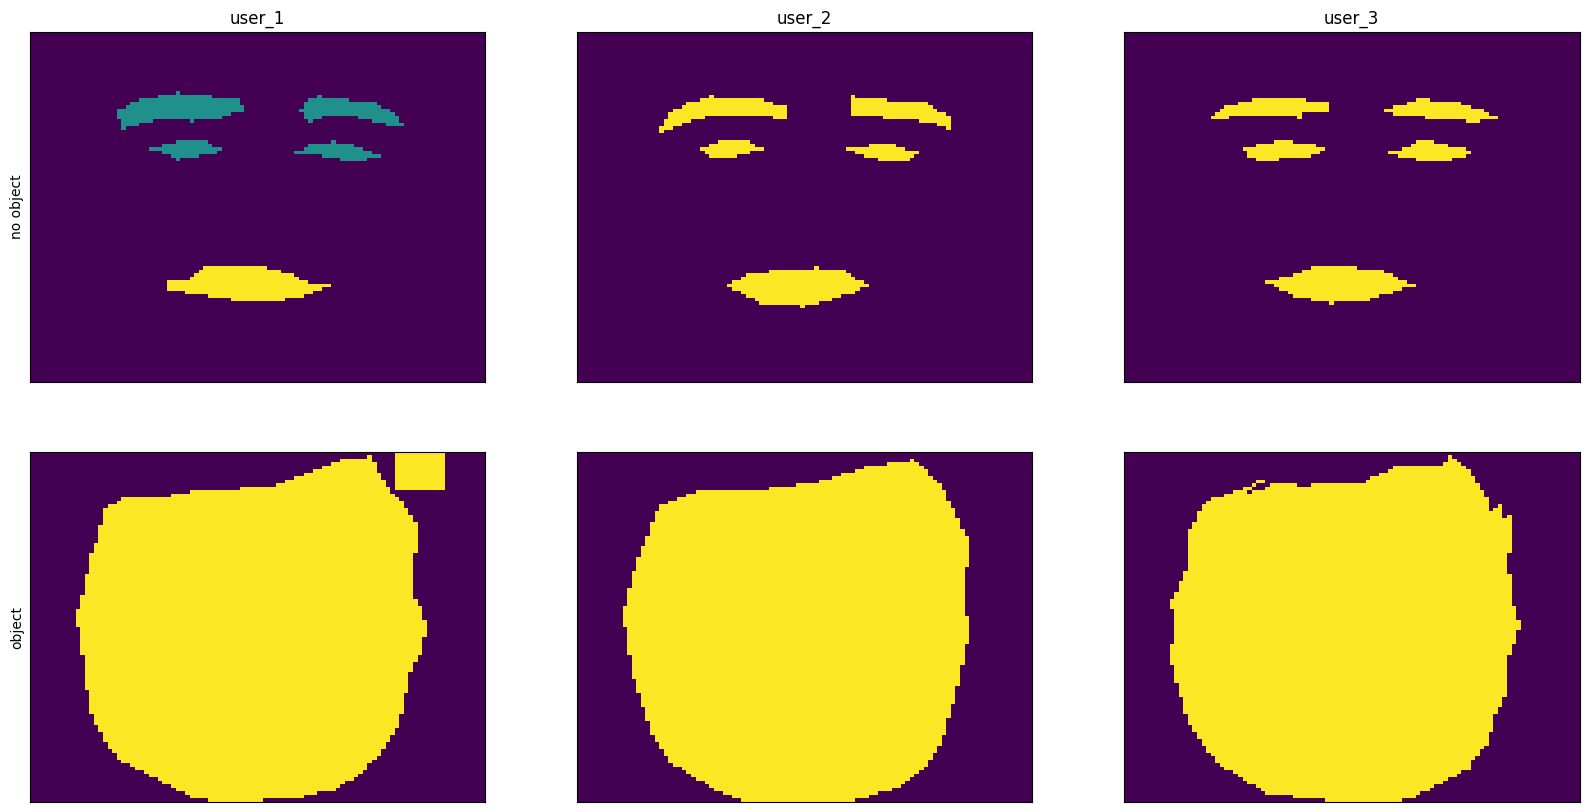

In [5]:
vis_group = Visualizer(group)
vis_group.draw(group)

# Aggregate

In [6]:
aggregator = MaskAggregation()

Total results of aggregation:
- Every failed step sends markup group to next method in this order `['hard', 'drop', 'soft']`,
- To make drop logic work, you shold have more than 3 markups on image and possibly a lower threshold/confidence value,
- Every markup, that failed all the methods goes to `['fail']`.

In [7]:
data.load_markups(df, toloka_masks_to_template)
results = aggregator.get_aggregation_results(data, threshold=0.5, confidence=0.6)

100%|██████████| 10/10 [00:00<00:00, 735.64it/s]


In [8]:
results.keys()

dict_keys(['hard', 'drop', 'soft', 'fail'])

In [9]:
len(results['hard']), len(results['drop']), len(results['soft']), len(results['fail'])

(4, 3, 1, 2)

In [10]:
results

{'hard': [(MarkupGroup object
   name: case_000_ov3
   data_len: 6
   annotators_len: 3,
   MarkupGroup object
   name: case_000_ov3
   data_len: 2
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_001_ov3
   data_len: 6
   annotators_len: 3,
   MarkupGroup object
   name: case_001_ov3
   data_len: 2
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_001_ov4
   data_len: 8
   annotators_len: 4,
   MarkupGroup object
   name: case_001_ov4
   data_len: 2
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3', 'user_4'},
   set()),
  (MarkupGroup object
   name: case_001_ov5
   data_len: 10
   annotators_len: 5,
   MarkupGroup object
   name: case_001_ov5
   data_len: 2
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3', 'user_4', 'user_5'},
   set())],
 'drop': [(MarkupGroup object
   name: case_002_ov4
   data_len: 8
   annotators_len: 4,
   MarkupGroup object
   name: case_002

# Visualise results

<font color='green'> Green </font> color at the top of image shows that annotators are __correct__. <font color="red">Red</font> color will be showing otherwise.

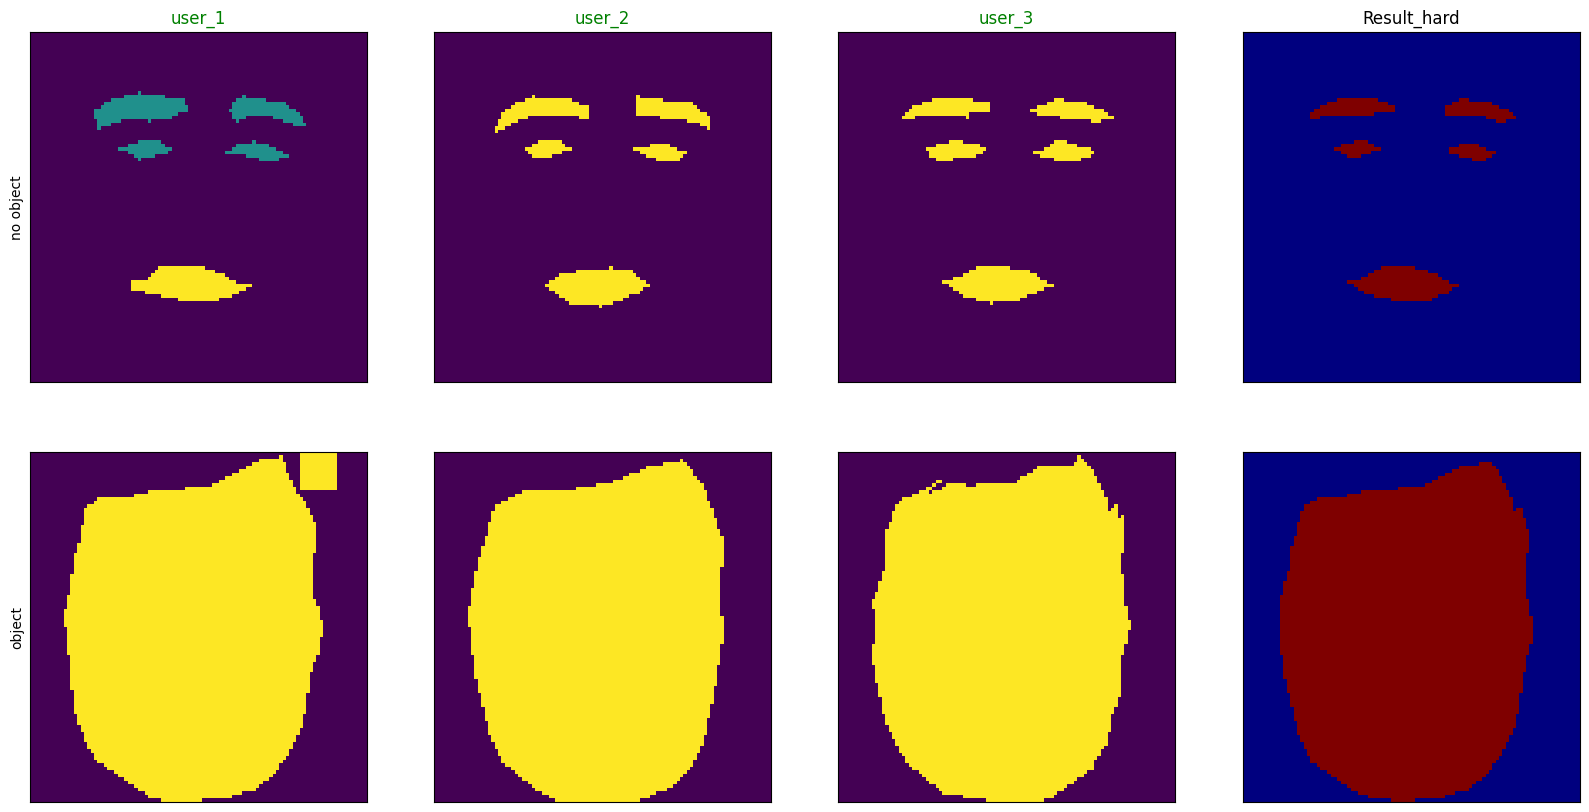

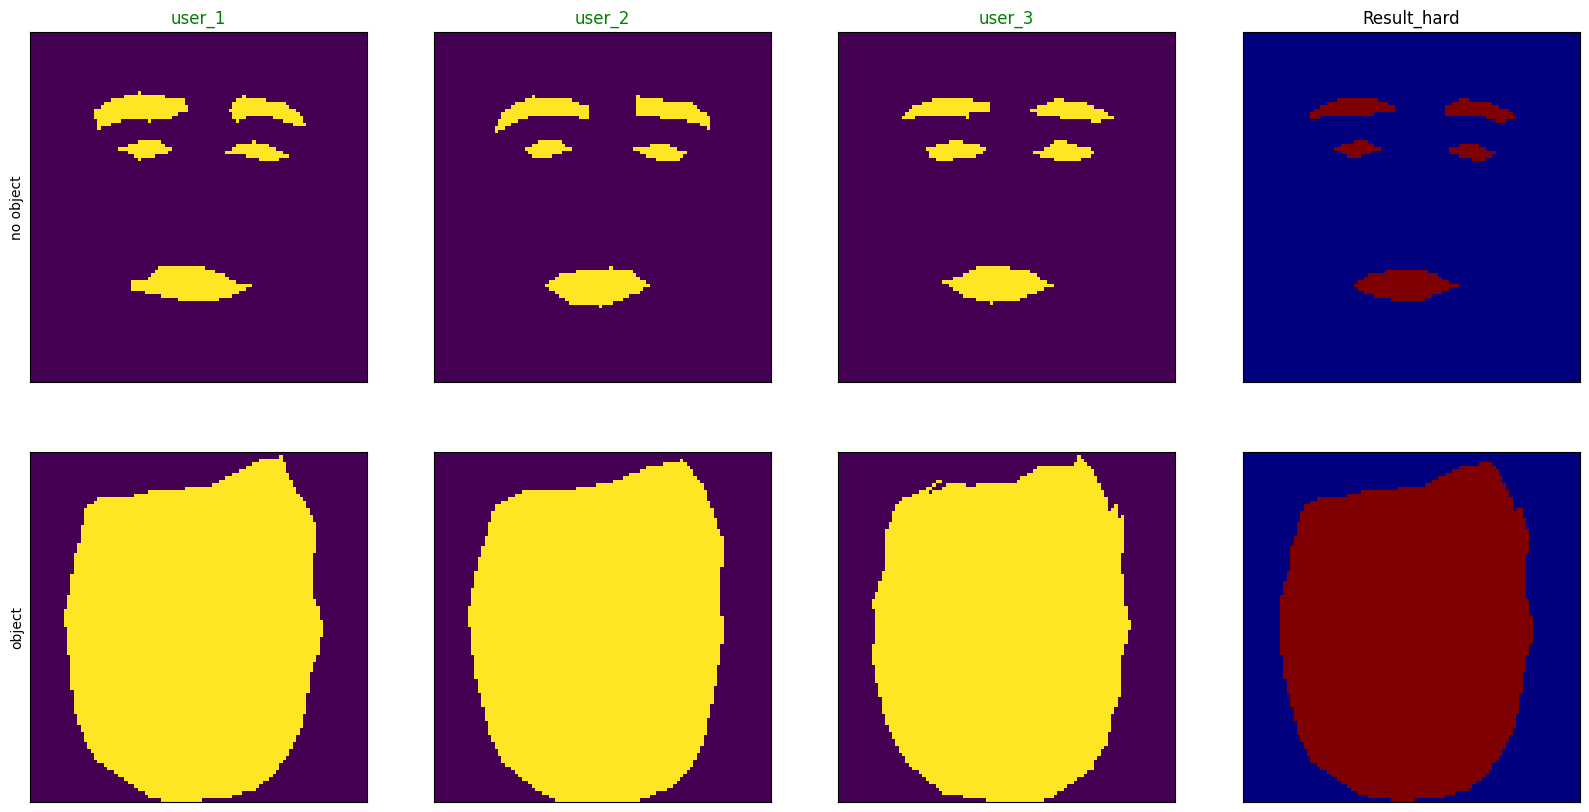

In [11]:
#  Example 0
#    Overlap: 3
#
#  We had 3 markups on image, but the user_1 added one error shape.
#  Below is a comparison with the etalon.

method, group = aggregator.get_group_by_name(results, 'case_000_ov3')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_001_ov3')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

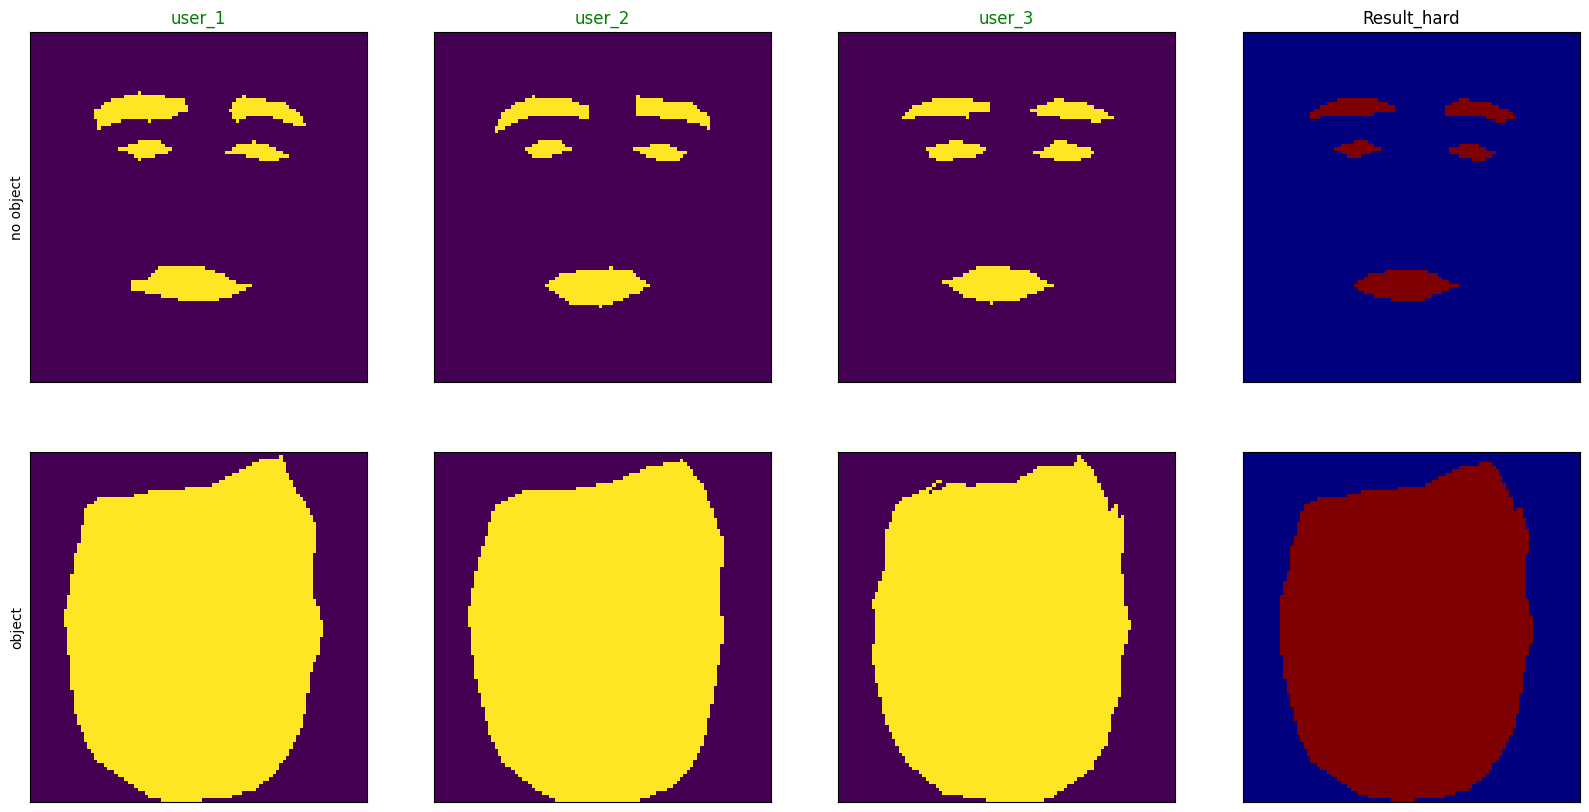

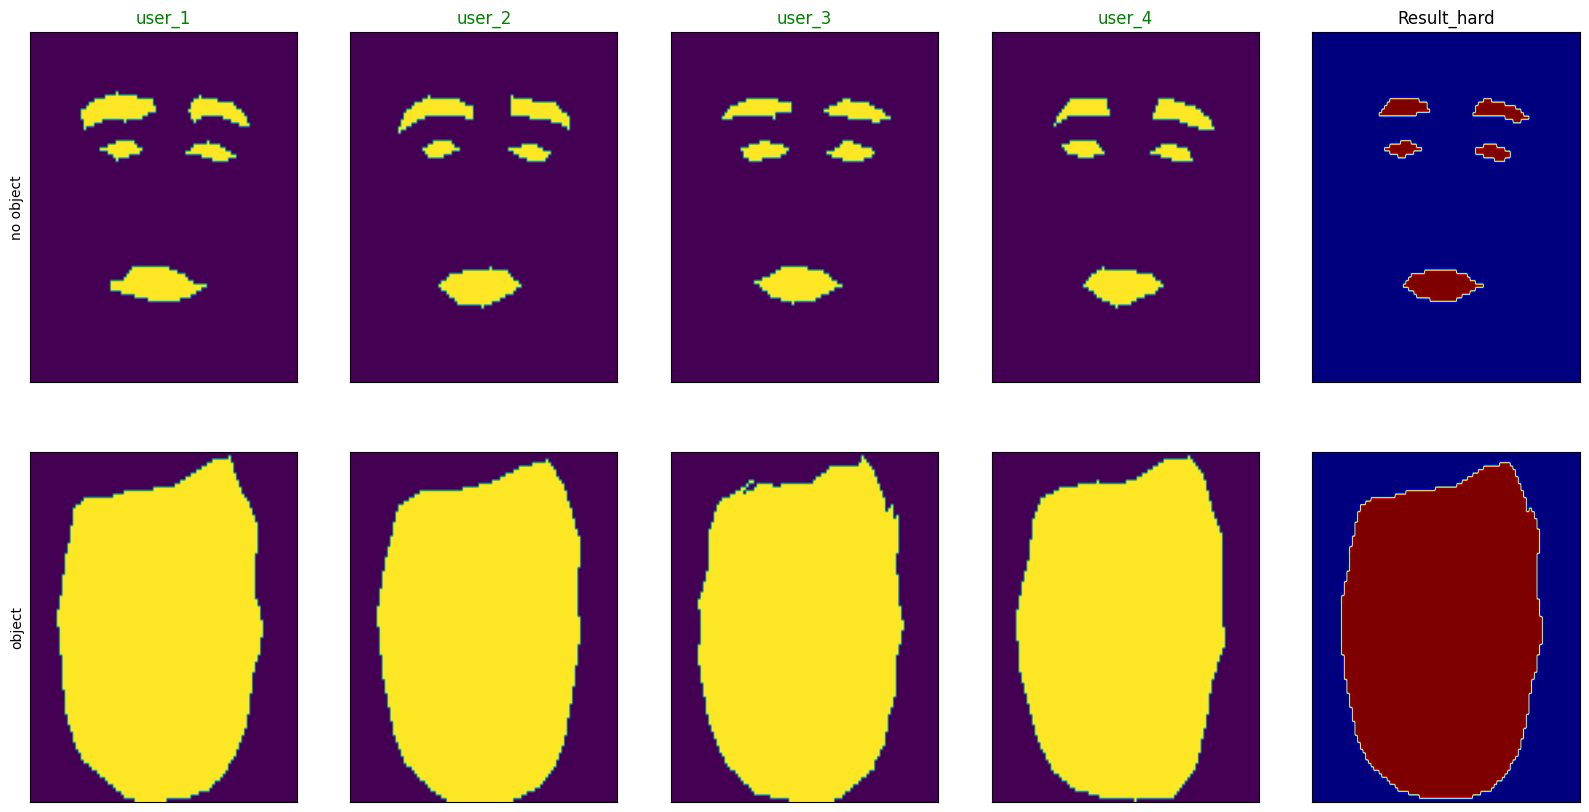

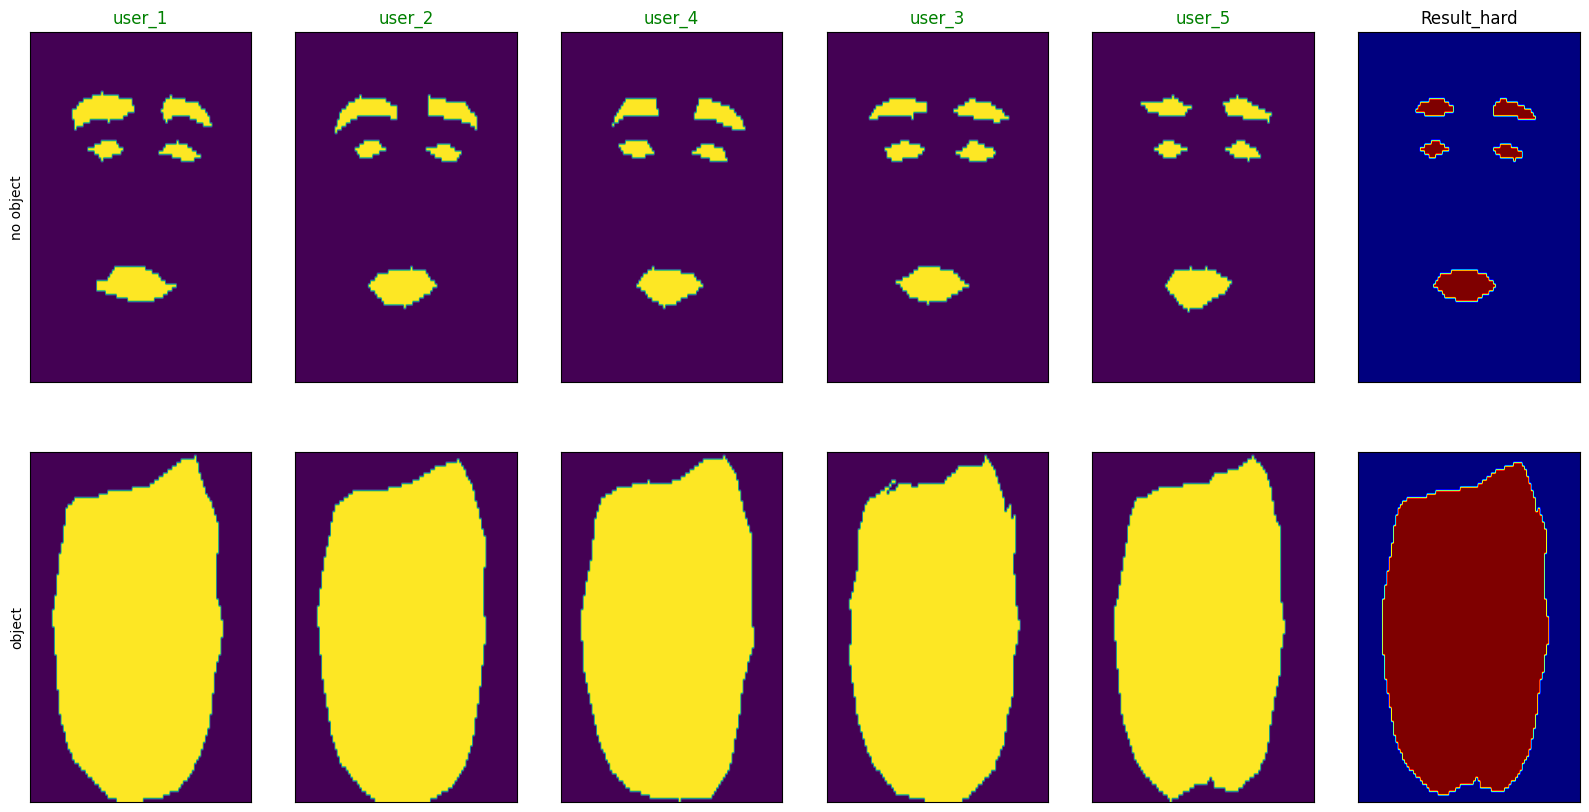

In [12]:
#  Example 1
#    Overlap: 3-5
#
#  We can see how the quantity and quality of markup affects the result.

method, group = aggregator.get_group_by_name(results, 'case_001_ov3')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_001_ov4')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_001_ov5')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

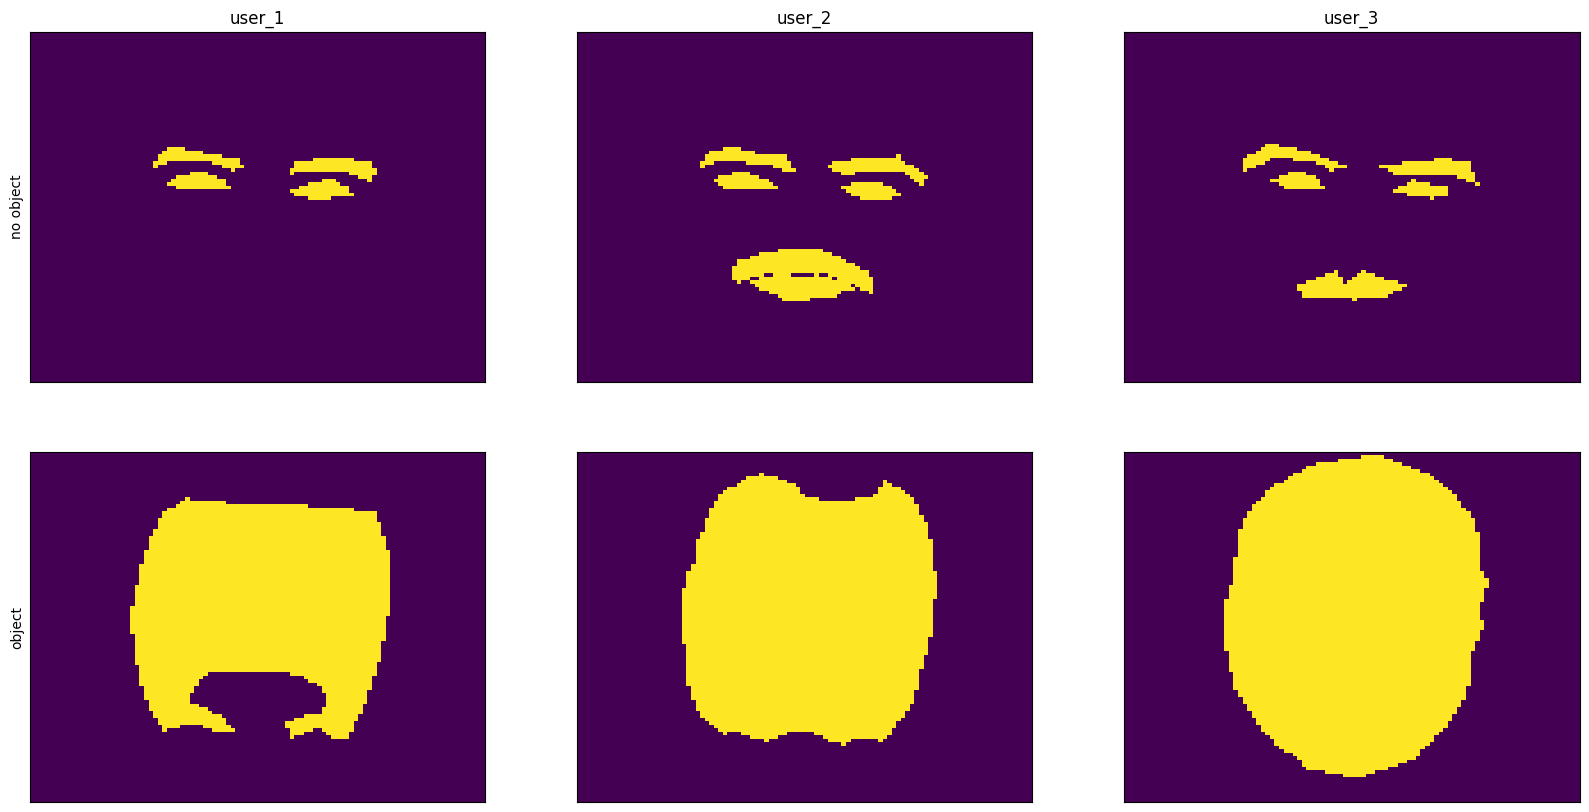

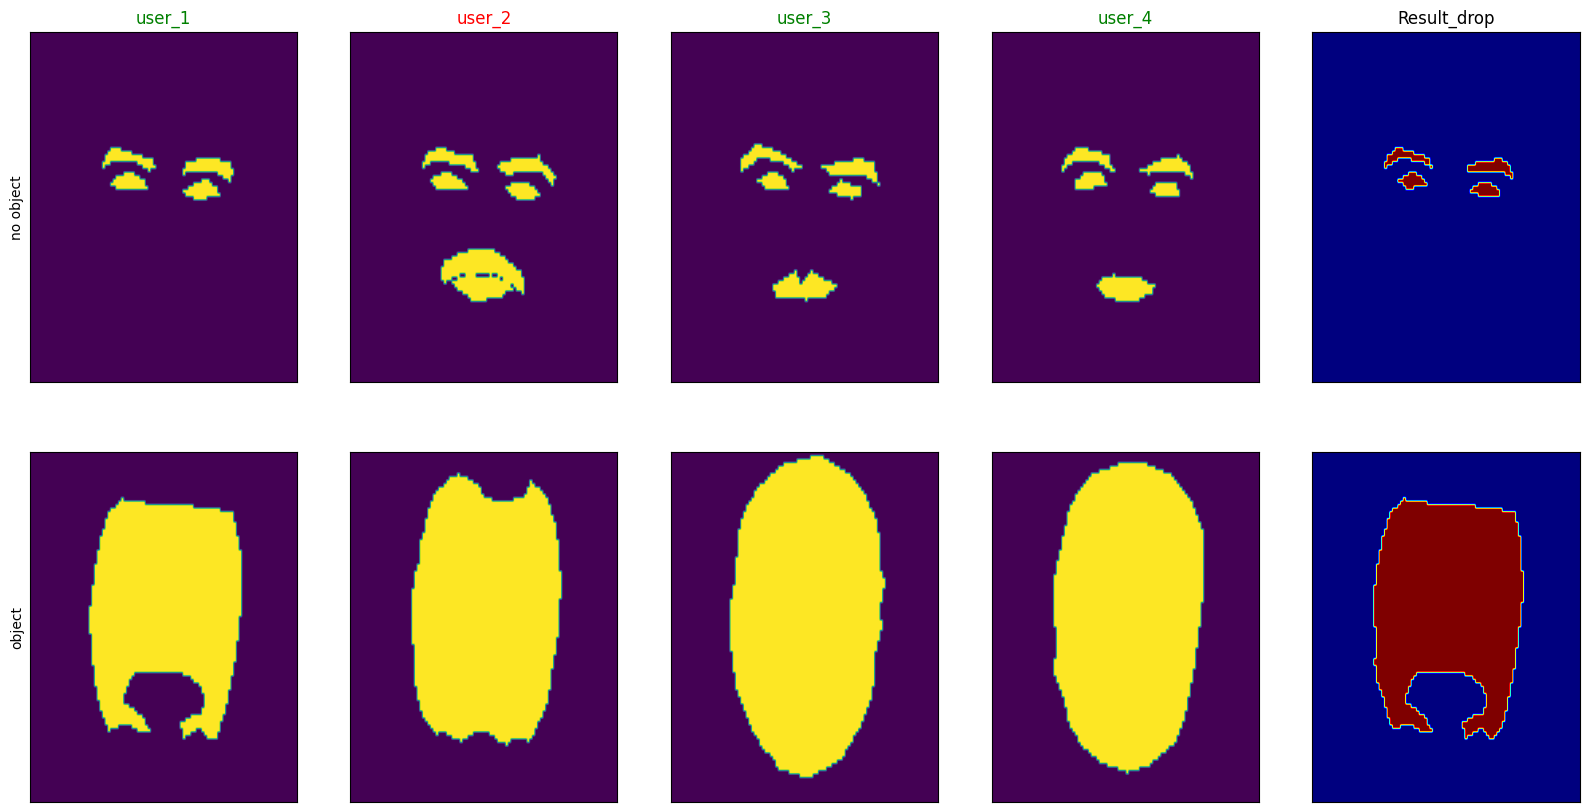

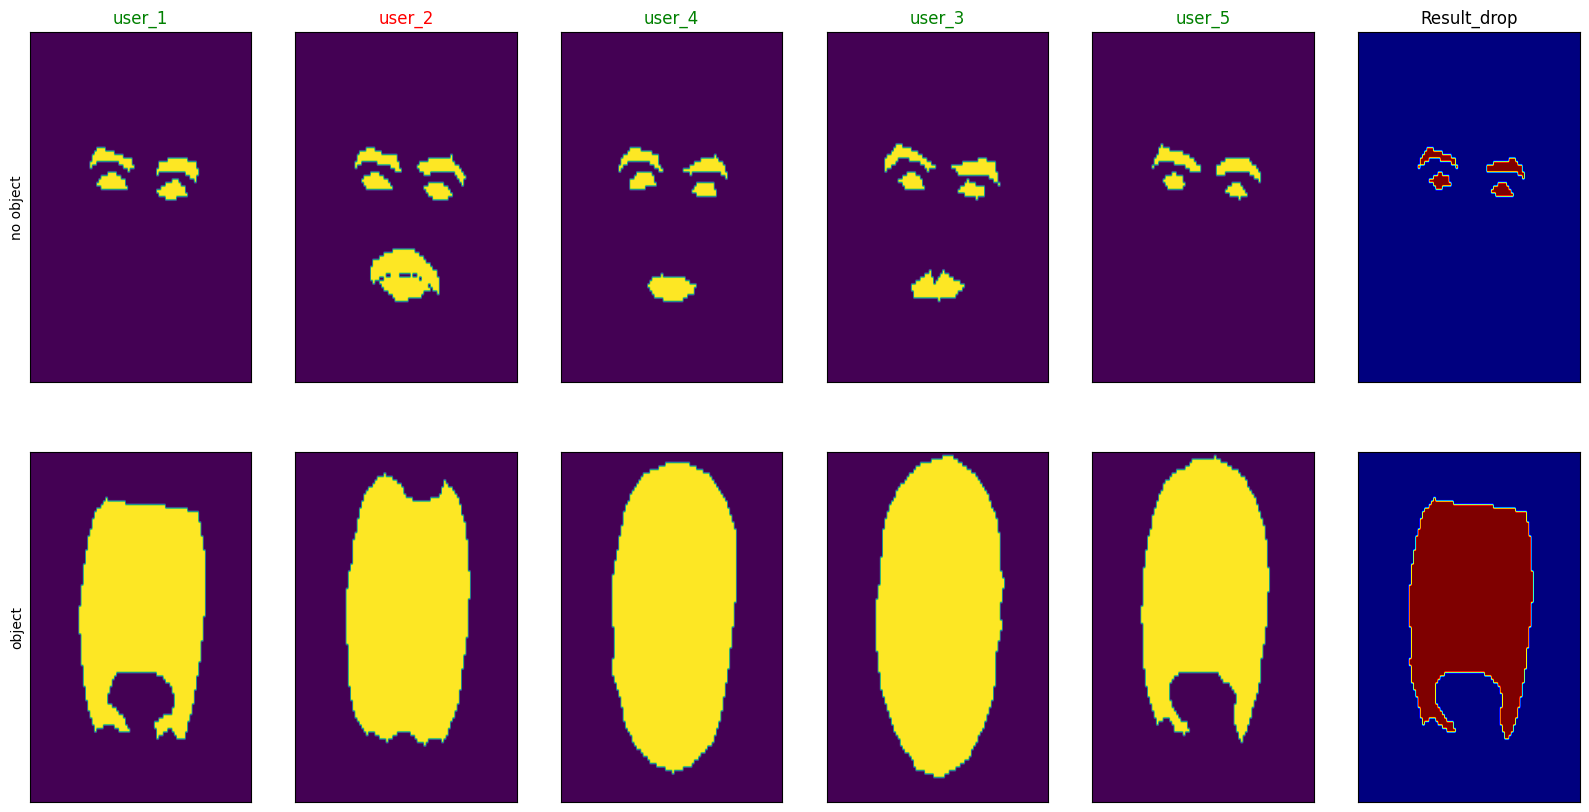

In [13]:
#  Example 2
#    Overlap: 3-5
#
#  We can see how the quantity and quality of markup affects the result.

method, group = aggregator.get_group_by_name(results, 'case_002_ov3')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_002_ov4')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_002_ov5')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

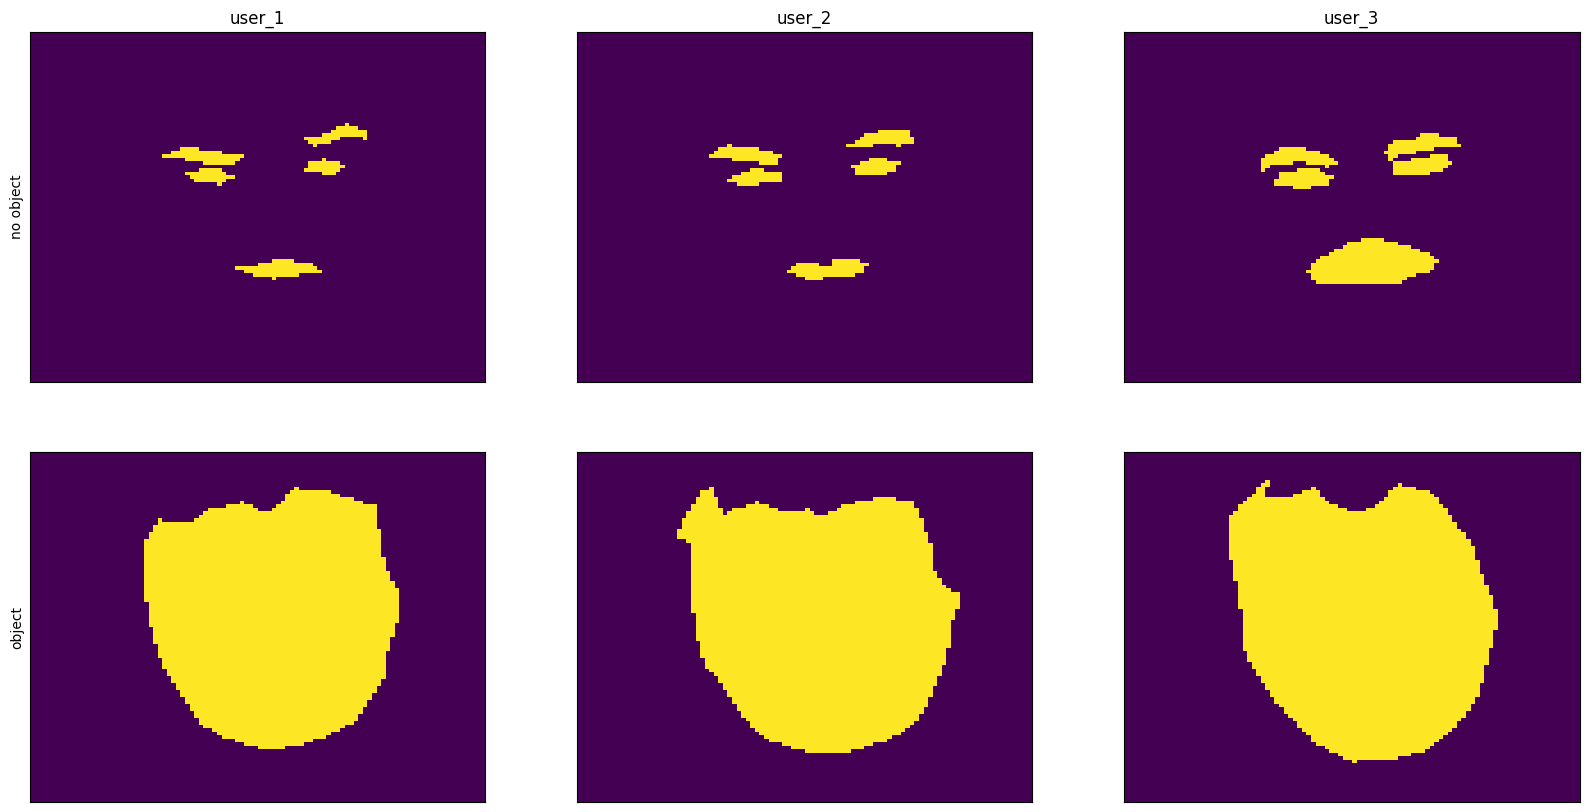

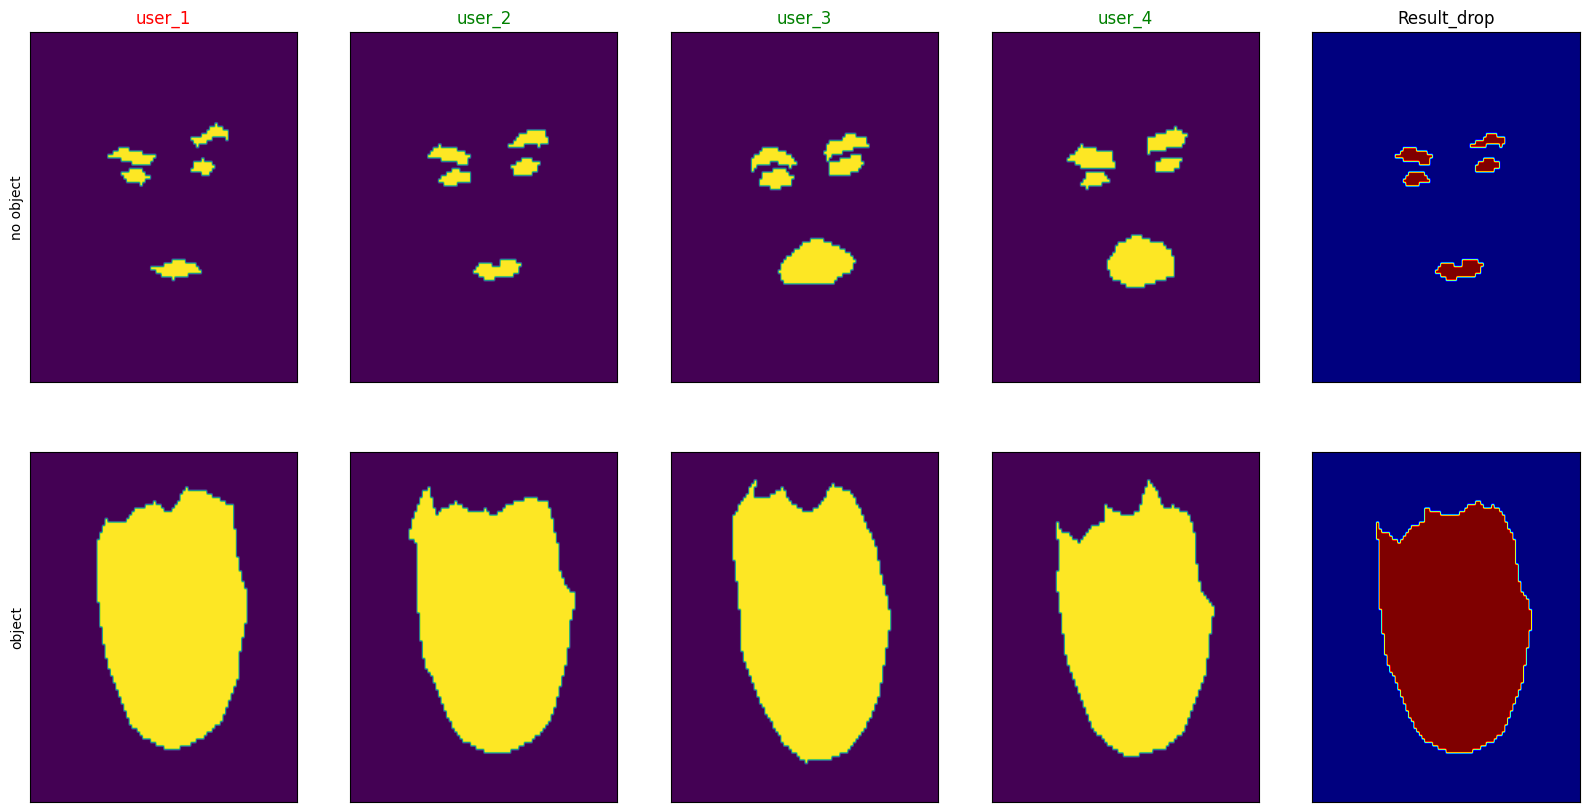

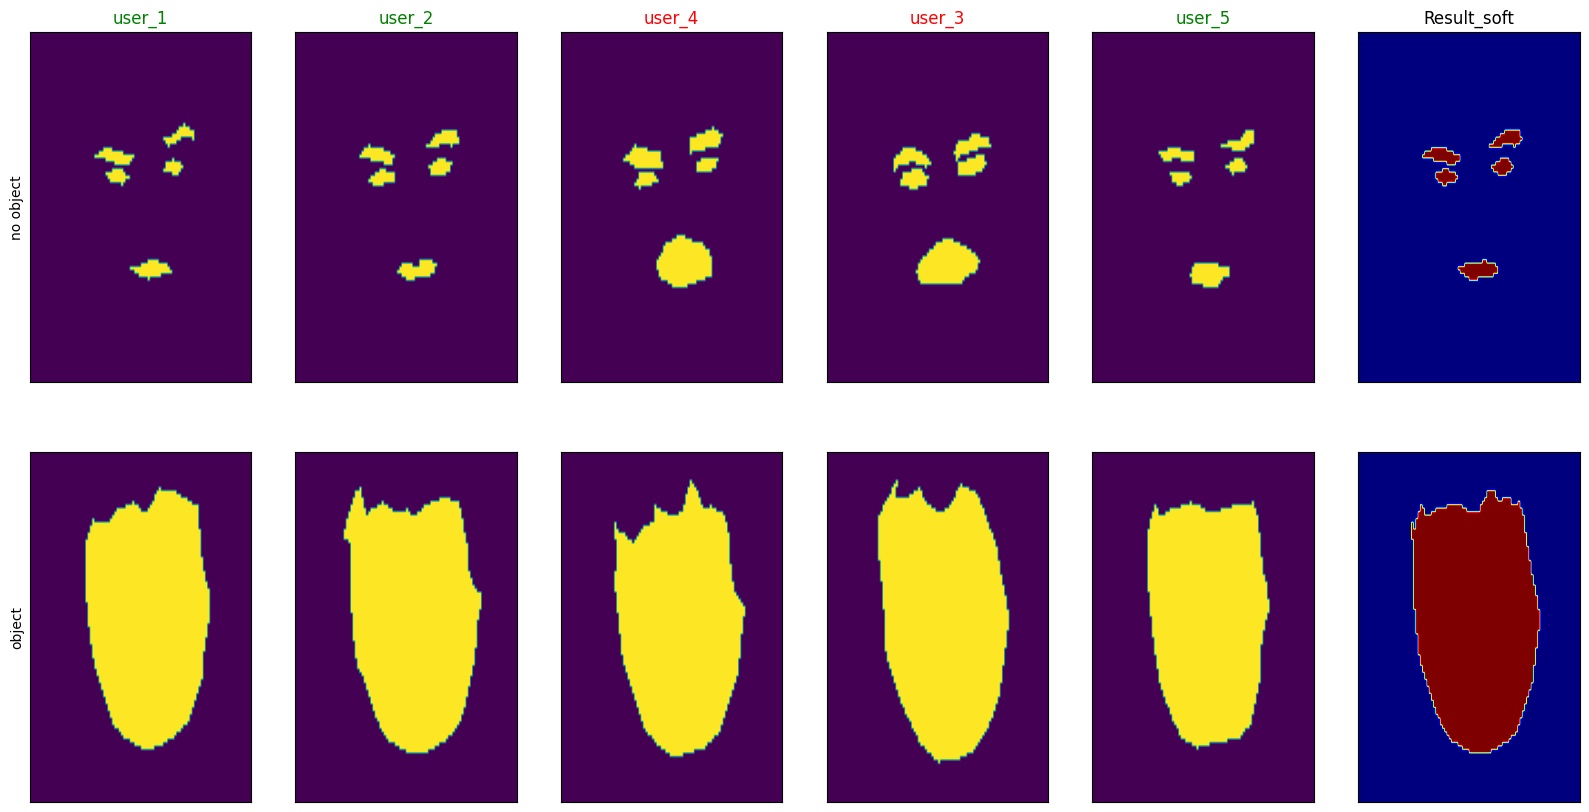

In [14]:
#  Example 3
#    Overlap: 3-5
#
#  We can see how the quantity and quality of markup affects the result.

method, group = aggregator.get_group_by_name(results, 'case_003_ov3')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_003_ov4')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_003_ov5')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)